In [1]:
# import các thư viện cần thiết
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Tải dữ liệu huấn luyện và dữ liệu đánh giá cho mô hình
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [3]:
print(y_train)

[5 0 4 ... 5 6 8]


In [4]:
# Xây dựng cấu trúc mô hình
def DCNN1_model():
    # CNN layer
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(64, (5, 5), input_shape=(28,28,1), activation = 'relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Conv2D(32, (3, 3), activation= 'relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.25))

    model.add(keras.layers.Flatten())

    # MLP with 3 hidden layer
    model.add(keras.layers.Dense(375, activation='relu'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Dense(225, activation= 'relu'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Dense(135, activation='relu'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Dense(10, activation= 'softmax'))
    
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
    return model

In [7]:
# Huấn luyện mô hình
model = DCNN1_model()
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, batch_size=256, verbose=2)

Epoch 1/10
235/235 - 75s - loss: 2.7681 - accuracy: 0.2192 - val_loss: 1.4241 - val_accuracy: 0.4723 - 75s/epoch - 319ms/step
Epoch 2/10
235/235 - 73s - loss: 1.4608 - accuracy: 0.4772 - val_loss: 0.8897 - val_accuracy: 0.6689 - 73s/epoch - 311ms/step
Epoch 3/10
235/235 - 73s - loss: 0.8767 - accuracy: 0.7120 - val_loss: 0.3840 - val_accuracy: 0.8889 - 73s/epoch - 311ms/step
Epoch 4/10
235/235 - 73s - loss: 0.5359 - accuracy: 0.8541 - val_loss: 0.2025 - val_accuracy: 0.9469 - 73s/epoch - 310ms/step
Epoch 5/10
235/235 - 73s - loss: 0.4276 - accuracy: 0.8899 - val_loss: 0.1751 - val_accuracy: 0.9543 - 73s/epoch - 312ms/step
Epoch 6/10
235/235 - 72s - loss: 0.3936 - accuracy: 0.9024 - val_loss: 0.1504 - val_accuracy: 0.9612 - 72s/epoch - 308ms/step
Epoch 7/10
235/235 - 74s - loss: 0.3533 - accuracy: 0.9142 - val_loss: 0.1350 - val_accuracy: 0.9662 - 74s/epoch - 314ms/step
Epoch 8/10
235/235 - 72s - loss: 0.3457 - accuracy: 0.9176 - val_loss: 0.1542 - val_accuracy: 0.9654 - 72s/epoch - 307

In [ ]:
# Lưu lại mô hình
model.save("HWR model")

In [6]:
# Tải mô hình có sẵn
model2 = keras.models.load_model("HWR model")

In [7]:
# Đánh giá mô hình
pred = np.argmax(model2.predict(X_test),axis=1)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       975
           1       0.99      0.99      0.99      1137
           2       0.98      0.93      0.95      1091
           3       0.97      0.98      0.97       999
           4       0.95      0.97      0.96       958
           5       0.97      0.97      0.97       899
           6       0.98      0.97      0.98       968
           7       0.89      0.98      0.93       930
           8       0.94      0.94      0.94       974
           9       0.97      0.91      0.94      1069

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



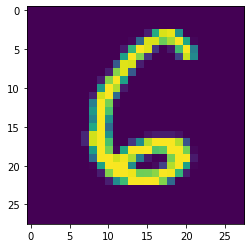

Prediction of model: 6


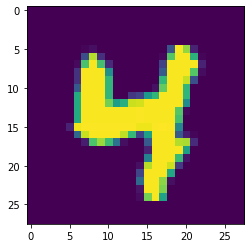

Prediction of model: 4


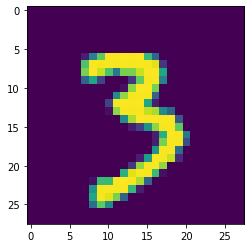

Prediction of model: 3


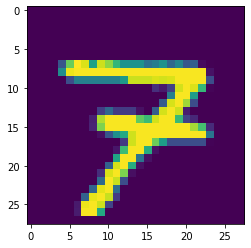

Prediction of model: 7


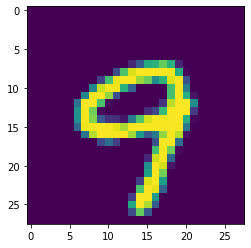

Prediction of model: 9


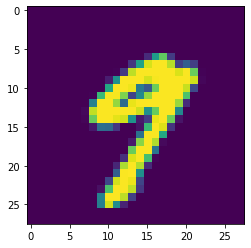

Prediction of model: 9


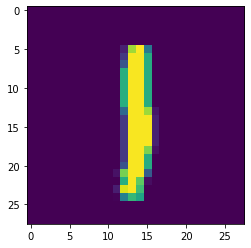

Prediction of model: 1


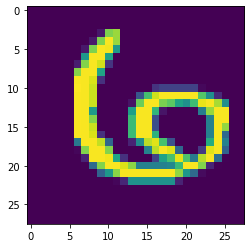

Prediction of model: 6


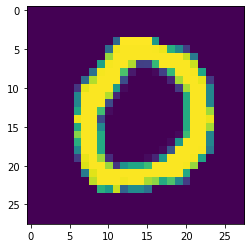

Prediction of model: 0


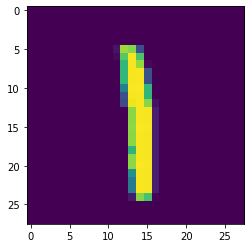

Prediction of model: 1


In [ ]:
# Sử dụng mô hình để dự đoán hình ảnh
import cv2 as cv
for i in range(10):
    cnt = np.random.randint(1,100)
    img = cv.imread(f"MNIST/img_{cnt}.png")
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    plt.imshow(img)
    plt.show()
    # cv.destroyAllWindows()
    y_predict = np.argmax(model2.predict(np.array([img])),axis=1)
    print(f'Prediction of model: {y_predict[0]}')